In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [2]:
import matplotlib.ticker as ticker

In [3]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Information Coefficient Analysis

In [4]:
ret_df = pd.read_pickle('./output_data/factor_exposure/all_exposure.pkl')

In [5]:
ret_df

secID ret_date  tradeDate       ret        rf     exret  \
0       000001.XSHE  2007-07 2007-06-29  0.316497  0.002481  0.314016   
1       000001.XSHE  2007-08 2007-07-31  0.048855  0.002404  0.046451   
2       000001.XSHE  2007-09 2007-08-31  0.052105  0.002621  0.049484   
3       000001.XSHE  2007-10 2007-09-28  0.201851  0.003095  0.198756   
4       000001.XSHE  2007-11 2007-10-31 -0.249116  0.003780 -0.252896   
5       000001.XSHE  2007-12 2007-11-30  0.069845  0.003011  0.066834   
6       000001.XSHE  2008-01 2007-12-28 -0.137306  0.002949 -0.140255   
7       000001.XSHE  2008-02 2008-01-31 -0.004504  0.002946 -0.007450   
...             ...      ...        ...       ...       ...       ...   
616455  689009.XSHG  2023-10 2023-09-28 -0.058570  0.001890 -0.060460   
616456  689009.XSHG  2023-11 2023-10-31  0.009454  0.001914  0.007540   
616457  689009.XSHG  2023-12 2023-11-30 -0.103927  0.002068 -0.105996   
616458  689009.XSHG  2024-01 2023-12-29 -0.213082  0.001902 -0.214983   
616459  689009.XSHG  2024-02 2024-01-31  0.298201  0.001749  0.296451   
616460  689009.XSHG  2024-03 2024-02-29 -0.011551  0.001783 -0.013334   
616461  689009.XSHG  2024-04 2024-03-29 -0.071786  0.001687 -0.073474   
616462  689009.XSHG      NaT 2024-04-12       NaN       NaN       NaN   

             ym        mktcap       size       rev mom_date       mom    beta  \
0       2007-06  4.266117e+10  24.476555       NaN      NaT       NaN  0.4614   
1       2007-07  5.616330e+10  24.751529  0.314016  2007-06       NaN  0.6423   
2       2007-08  5.890714e+10  24.799228  0.046451  2007-07       NaN  0.7722   
3       2007-09  6.197651e+10  24.850021  0.049484  2007-08       NaN  0.7596   
4       2007-10  7.448652e+10  25.033884  0.198756  2007-09       NaN  0.7988   
5       2007-11  5.593078e+10  24.747381 -0.252896  2007-10       NaN  0.9560   
6       2007-12  6.574629e+10  24.909069  0.066834  2007-11       NaN  0.9468   
7       2008-01  5.850212e+10  24.792329 -0.140255  2007-12       NaN  0.9654   
...         ...           ...        ...       ...      ...       ...     ...   
616455  2023-09  1.785208e+10  23.605386  0.040598  2023-08 -0.127904  0.9152   
616456  2023-10  1.716478e+10  23.566125 -0.060460  2023-09  0.088437  0.9247   
616457  2023-11  1.732706e+10  23.575535  0.007540  2023-10 -0.017675  0.9541   
616458  2023-12  1.552630e+10  23.465801 -0.105996  2023-11  0.085602  1.0448   
616459  2024-01  1.221793e+10  23.226170 -0.214983  2023-12 -0.106357  1.2314   
616460  2024-02  1.586132e+10  23.487149  0.296451  2024-01 -0.292727  1.4905   
616461  2024-03  1.543851e+10  23.460131 -0.013334  2024-02 -0.195005  1.5477   
616462  2024-04  1.433023e+10  23.385637 -0.073474  2024-03 -0.104366     NaN   

              bm     illiq  illiq_12m       vol      ivol  vol_clip  ivol_clip  
0       0.123739       NaN        NaN       NaN       NaN       NaN        NaN  
1       0.093992  0.000040        NaN  0.041604       NaN  0.041604        NaN  
2       0.097085  0.000020        NaN  0.033926       NaN  0.033926        NaN  
3       0.092276  0.000025        NaN  0.023872       NaN  0.023872        NaN  
4       0.083411  0.000030        NaN  0.035921       NaN  0.035921        NaN  
5       0.111084  0.000048        NaN  0.033184       NaN  0.033184        NaN  
6       0.094476  0.000025        NaN  0.026541       NaN  0.026541        NaN  
7       0.109513  0.000039        NaN  0.037722  0.012909  0.037722   0.012909  
...          ...       ...        ...       ...       ...       ...        ...  
616455  0.209367  0.000114   0.000119  0.014750  0.006809  0.014750   0.006809  
616456  0.223899  0.000226   0.000118  0.019076  0.011139  0.019076   0.011139  
616457  0.221803  0.000086   0.000115  0.017594  0.015128  0.017594   0.015128  
616458  0.247525  0.000110   0.000107  0.024634  0.018228  0.024634   0.018228  
616459  0.313607  0.000184   0.000116  0.024607  0.013890  0.024607   0.013890  
616460  0.241569  0.00016

In [6]:
ic_illiq = ret_df.groupby('ret_date')[['exret','illiq']].corr(method='spearman')
ic_illiq.reset_index(inplace=True)
ic_illiq

ret_date level_1     exret     illiq
0    2007-03   exret  1.000000  0.237741
1    2007-03   illiq  0.237741  1.000000
2    2007-04   exret  1.000000 -0.105738
3    2007-04   illiq -0.105738  1.000000
4    2007-05   exret  1.000000 -0.066643
5    2007-05   illiq -0.066643  1.000000
6    2007-06   exret  1.000000 -0.092576
7    2007-06   illiq -0.092576  1.000000
..       ...     ...       ...       ...
404  2024-01   exret  1.000000 -0.153917
405  2024-01   illiq -0.153917  1.000000
406  2024-02   exret  1.000000 -0.467736
407  2024-02   illiq -0.467736  1.000000
408  2024-03   exret  1.000000  0.303199
409  2024-03   illiq  0.303199  1.000000
410  2024-04   exret  1.000000  0.045239
411  2024-04   illiq  0.045239  1.000000

[412 rows x 4 columns]

In [7]:
ic_illiq = ic_illiq[ic_illiq['level_1'] != 'illiq'].drop(['exret','level_1'],axis=1)

In [8]:
ic_illiq

ret_date     illiq
0    2007-03  0.237741
2    2007-04 -0.105738
4    2007-05 -0.066643
6    2007-06 -0.092576
8    2007-07  0.195419
10   2007-08 -0.076739
12   2007-09 -0.073333
14   2007-10 -0.081541
..       ...       ...
396  2023-09  0.140319
398  2023-10  0.129749
400  2023-11  0.234517
402  2023-12  0.095490
404  2024-01 -0.153917
406  2024-02 -0.467736
408  2024-03  0.303199
410  2024-04  0.045239

[206 rows x 2 columns]

In [9]:
ic_illiq.set_index('ret_date',inplace=True)

In [10]:
# ic_illiq.index = ic_illiq.index.to_timestamp()

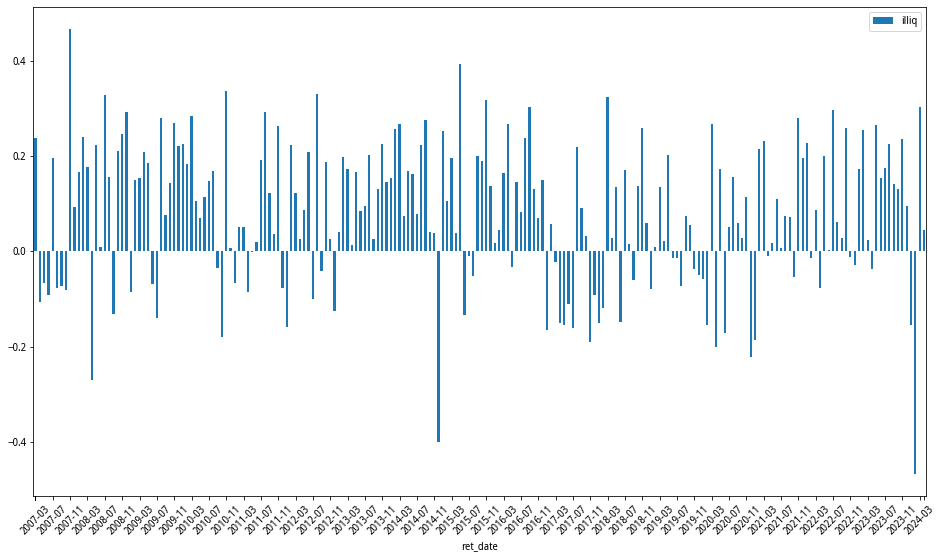

In [10]:
# fig, ax = plt.subplots()
# plt.bar(ic_illiq.index, ic_illiq['illiq'])
# plt.gca().xaxis.set_major_locator(dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
# # fig.autofmt_xdate()
# plt.show()
ax = ic_illiq.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.show()

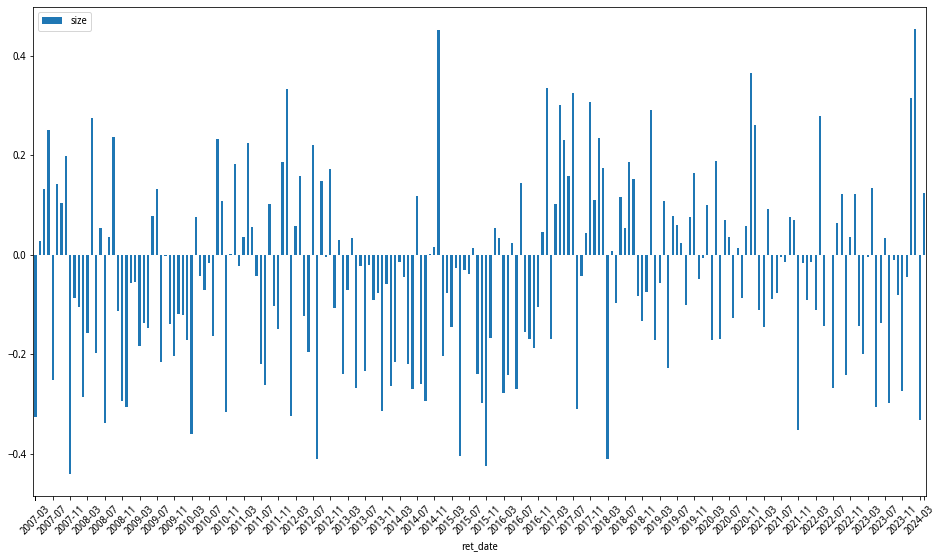

In [11]:
ic_size = ret_df.groupby('ret_date')[['exret','size']].corr(method='spearman')
ic_size.reset_index(inplace=True)
ic_size = ic_size[ic_size['level_1'] != 'size'].drop(['exret','level_1'],axis=1)
ic_size.set_index('ret_date',inplace=True)
ax = ic_size.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

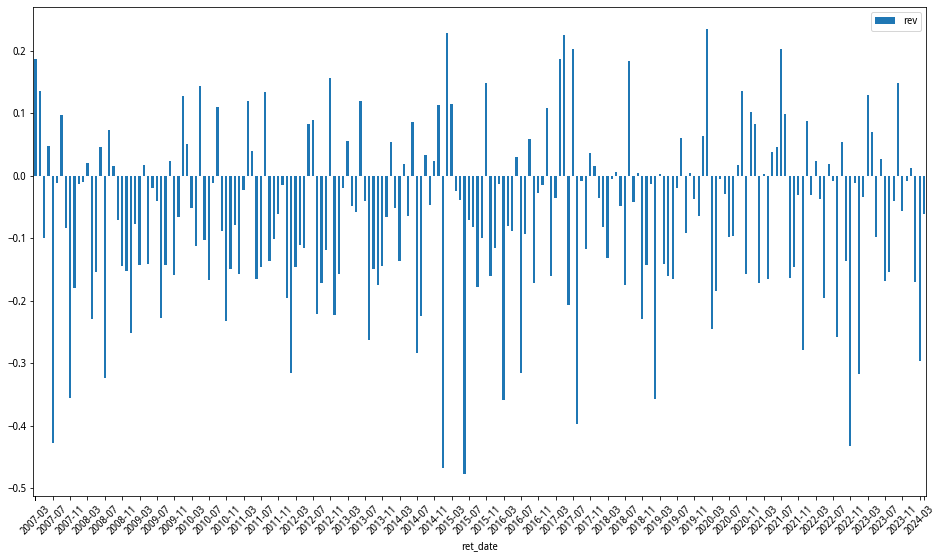

In [12]:
ic_rev = ret_df.groupby('ret_date')[['exret','rev']].corr(method='spearman')
ic_rev.reset_index(inplace=True)
ic_rev = ic_rev[ic_rev['level_1'] != 'rev'].drop(['exret','level_1'],axis=1)
ic_rev.set_index('ret_date',inplace=True)
ax = ic_rev.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

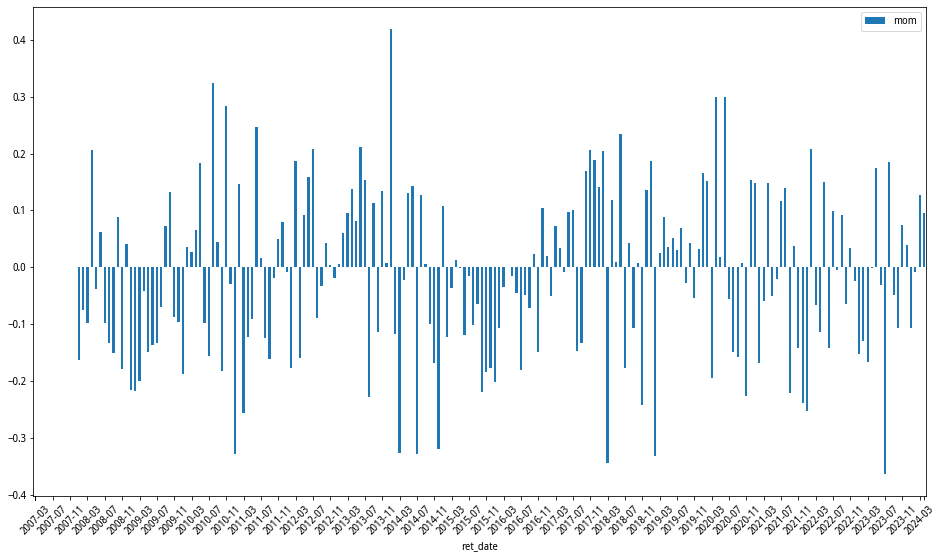

In [13]:
ic_rev = ret_df.groupby('ret_date')[['exret','mom']].corr(method='spearman')
ic_rev.reset_index(inplace=True)
ic_rev = ic_rev[ic_rev['level_1'] != 'mom'].drop(['exret','level_1'],axis=1)
ic_rev.set_index('ret_date',inplace=True)
ax = ic_rev.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [14]:
cols = ['beta','size','bm','mom','rev','illiq','ivol']
ic_df = pd.DataFrame()
for col in cols:
    temp = ret_df.groupby('ret_date')[['exret',col]].corr(method='spearman')
    temp.reset_index(inplace=True)
    ic_df[col] = temp[temp['level_1'] != col].drop(['exret','level_1','ret_date'],axis=1)[col].values

In [15]:
ic_df.index = np.sort(ret_df['ret_date'].unique().dropna())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feeadce6e10>,
      dtype=object)

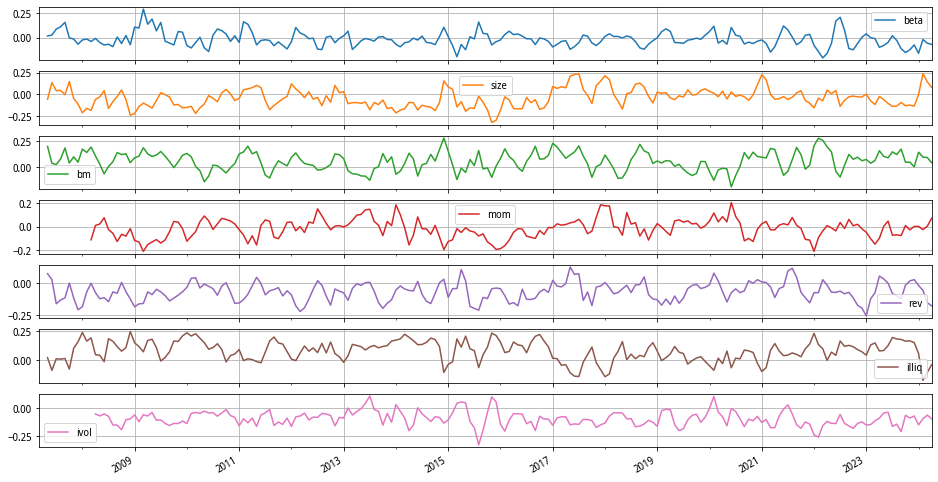

In [16]:
ic_df[cols].rolling(3).mean().plot(subplots=True,grid=True)

information ratio = IC.mean()/IC.std()

In [17]:
# Information ratio
ic_df.apply(lambda x: x.mean()/x.std())

beta    -0.096878
size    -0.219969
bm       0.362174
mom     -0.107057
rev     -0.475244
illiq    0.526944
ivol    -0.713458
dtype: float64

# Fund performance

## Fund return data

In [18]:
START = '2007-01-01'
END = '2024-03-31'
# Security Id
fund_info = DataAPI.SecIDGet(assetClass="F",pandas="1")

In [19]:
fund_info

secID  ticker                                       secShortName  \
0      000001.OFCN  000001                                               华夏成长   
1      000003.OFCN  000003                                          中海可转债债券-A   
2      000004.OFCN  000004                                          中海可转债债券-C   
3      000005.OFCN  000005                                         嘉实增强信用定开债券   
4      000006.OFCN  000006                                       西部利得量化成长混合-A   
5      000007.OFCN  000007                                          鹏华国有企业债债券   
6      000008.OFCN  000008                                     嘉实中证500ETF联接-A   
7      000009.OFCN  000009                                        易方达天天理财货币-A   
...            ...     ...                                                ...   
27946    BSJN.XNAS    BSJN  Invesco BulletShares 2023 High Yield Corporate...   
27947    BSJO.XNAS    BSJO  Invesco BulletShares 2024 High Yield Corporate...   
27948    BSJP.XNAS    BSJP  Invesco BulletShares 2025 High Yield Corporate...   
27949    BSJQ.XNAS    BSJQ  Invesco BulletShares 2026 High Yield Corporate...   
27950    GHYB.XNYS    GHYB                                               GHYB   
27951    HYXF.XNAS    HYXF                                               HYXF   
27952    JMHI.XPHS    JMHI                  JPMorgan High Yield Municipal ETF   
27953    SCYB.XPHS    SCYB                         Schwab High Yield Bond ETF   

                    cnSpell exchangeCD assetClass listStatusCD    listDate  \
0                      HXCZ        NaN          F           UN         NaN   
1                 ZHKZZZQ-A        NaN          F           UN         NaN   
2                 ZHKZZZQ-C        NaN          F           UN         NaN   
3                JSZQXYDKZQ        NaN          F           UN         NaN   
4              XBLDLHCZHH-A        NaN          F           UN         NaN   
5                 PHGYQYZZQ        NaN          F           UN         NaN   
6            JSZZ500ETFLJ-A        NaN          F           UN         NaN   
7               YFDTTLCHB-A        NaN          F           UN         NaN   
...                     ...        ...        ...          ...         ...   
27946  Invesco BulletSha...       XNAS          F            L         NaN   
27947  Invesco BulletSha...       XNAS          F            L         NaN   
27948  Invesco BulletSha...       XNAS          F            L         NaN   
27949  Invesco BulletSha...       XNAS          F            L         NaN   
27950                  GHYB       XNYS          F            L  2017-09-05   
27951                  HYXF       XNAS          F            L  2016-06-14   
27952  JPMorgan High Yie...       XPHS          F          NaN  2023-07-17   
27953  Schwab High Yield...       XPHS          F          NaN  2023-07-11   

      transCurrCD ISIN  partyID delistDate  
0             CNY  NaN  26812.0        NaN  
1             CNY  NaN  16550.0        NaN  
2             CNY  NaN  16550.0        NaN  
3             CNY  NaN  26817.0        NaN  
4             CNY  NaN  40283.0        NaN  
5             CNY  NaN  26816.0        NaN  
6             CNY  NaN  26817.0        NaN  
7             CNY  NaN  26932.0        NaN  
...           ...  ...      ...        ...  
27946         USD  NaN      NaN        NaN  
27947         USD  NaN      NaN        NaN  
27948         USD  NaN      NaN        NaN  
27949         USD  NaN      NaN        NaN  
27950         USD  NaN      NaN        NaN  
27951         USD  NaN      NaN        NaN  
27952         NaN  NaN      NaN        NaN  
27953         NaN  NaN      NaN        NaN  

[27954 rows x 12 columns]

In [22]:
# fund_id = ['110022','009550','001938','009341',
#            '000751','004997','009863','001714',
#            '001410','004851','005827','110011',
#            '260108','163402','320007','163417',
#            '001511','161728','161005','161131']
# fund_id =["519212","519191","519185","001678",
#           "004685","001437","519198","002049",
#           "010761","000398","011891","001470",
#           "166301","008488","006195","002601",
#           "001959","011403","013142","001763"]
# fund_id = [id_+'.OFCN' for id_ in fund_id]
fund_id = ['014283', '001614', '016325', '001323', '001322', '001167', '210009', '014273', '290012', '016307', '014277', '210002', '162102', '004890', '620007', '014279', '217021', '010383', '005310', '004685']

In [24]:
len(fund_id)

20

In [23]:
fund_name = fund_info.loc[fund_info['ticker'].isin(fund_id),['ticker','secShortName']]
fund_name

ticker      secShortName
1120   001167        金鹰科技创新股票-A
1277   001322    东吴新趋势价值线灵活配置混合
1278   001323    东吴移动互联灵活配置混合-A
1577   001614          东方区域发展混合
4770   004685      金元顺安元启灵活配置混合
4971   004890      中邮健康文娱灵活配置混合
5386   005310  广发电子信息传媒产业精选股票-A
10395  010383        宝盈基础产业混合-A
...       ...               ...
23469  162102         金鹰中小盘精选-A
24289  210002    金鹰红利价值灵活配置混合-A
24298  210009        金鹰核心资源混合-A
24337  217021        招商优势企业混合-A
24472  290012            泰信保本混合
24473  290012    泰信行业精选灵活配置混合-A
27128  620007        金元顺安保本混合-A
27129  620007  金元顺安优质精选灵活配置混合-A

[22 rows x 2 columns]

In [25]:
fund_name.loc[~fund_name['secShortName'].str.contains('债')]

ticker      secShortName
1120   001167        金鹰科技创新股票-A
1277   001322    东吴新趋势价值线灵活配置混合
1278   001323    东吴移动互联灵活配置混合-A
1577   001614          东方区域发展混合
4770   004685      金元顺安元启灵活配置混合
4971   004890      中邮健康文娱灵活配置混合
5386   005310  广发电子信息传媒产业精选股票-A
10395  010383        宝盈基础产业混合-A
...       ...               ...
23469  162102         金鹰中小盘精选-A
24289  210002    金鹰红利价值灵活配置混合-A
24298  210009        金鹰核心资源混合-A
24337  217021        招商优势企业混合-A
24472  290012            泰信保本混合
24473  290012    泰信行业精选灵活配置混合-A
27128  620007        金元顺安保本混合-A
27129  620007  金元顺安优质精选灵活配置混合-A

[22 rows x 2 columns]

In [26]:
# fund_name = fund_name.loc[~fund_name['secShortName'].str.contains('债')].copy()

In [27]:
fund_name.loc[fund_name.duplicated('ticker',keep=False)] # keep='last'

ticker      secShortName
24472  290012            泰信保本混合
24473  290012    泰信行业精选灵活配置混合-A
27128  620007        金元顺安保本混合-A
27129  620007  金元顺安优质精选灵活配置混合-A

In [28]:
fund_name = fund_name.drop_duplicates('ticker',keep='last')
fund_name

ticker       secShortName
1120   001167         金鹰科技创新股票-A
1277   001322     东吴新趋势价值线灵活配置混合
1278   001323     东吴移动互联灵活配置混合-A
1577   001614           东方区域发展混合
4770   004685       金元顺安元启灵活配置混合
4971   004890       中邮健康文娱灵活配置混合
5386   005310   广发电子信息传媒产业精选股票-A
10395  010383         宝盈基础产业混合-A
...       ...                ...
16215  016307  景顺长城北交所精选两年定开混合-A
16233  016325    泰康北交所精选两年定开混合-A
23469  162102          金鹰中小盘精选-A
24289  210002     金鹰红利价值灵活配置混合-A
24298  210009         金鹰核心资源混合-A
24337  217021         招商优势企业混合-A
24473  290012     泰信行业精选灵活配置混合-A
27129  620007   金元顺安优质精选灵活配置混合-A

[20 rows x 2 columns]

In [29]:
# Fund_NAV_Month.csv 从 CSMAR 下载
# 基金市场系列 -> 公募基金 -> 基金表现 -> 基金月净值文件
fund_df = pd.read_csv('./data/Fund_NAV_Month.csv',dtype={'Symbol':str})
fund_df

TradingDate TradingMonth  Symbol    NAV  ReturnNAV
0       2001-12-28      2001-12  000001  1.000     0.0000
1       2002-01-31      2002-01  000001  1.002     0.0020
2       2002-02-28      2002-02  000001  1.013     0.0110
3       2002-03-31      2002-03  000001  1.023     0.0099
4       2002-04-30      2002-04  000001  1.046     0.0225
5       2002-05-31      2002-05  000001  1.027    -0.0182
6       2002-06-30      2002-06  000001  1.073     0.0448
7       2002-07-31      2002-07  000001  1.045    -0.0261
...            ...          ...     ...    ...        ...
999992  2015-03-31      2015-03  200012  1.366     0.1133
999993  2015-04-30      2015-04  200012  1.482     0.0849
999994  2015-05-29      2015-05  200012  1.485     0.0020
999995  2015-06-30      2015-06  200012  1.276    -0.1407
999996  2015-07-31      2015-07  200012  1.026    -0.1959
999997  2015-08-31      2015-08  200012  0.853    -0.1686
999998  2015-09-30      2015-09  200012  0.871     0.0211
999999  2015-10-30      2015-10  200012  1.006     0.1550

[1000000 rows x 5 columns]

In [30]:
top_fund_df = fund_df[fund_df['Symbol'].isin(fund_id)].copy()

In [31]:
top_fund_df['Symbol'].nunique()

15

In [32]:
top_fund_df.rename(columns={'Symbol':'ticker','TradingMonth':'ret_date','ReturnNAV':'ret'},inplace=True)

In [33]:
top_fund_df = pd.merge(top_fund_df, fund_name, on='ticker')

In [34]:
top_fund_df = top_fund_df[['ret_date','ticker','secShortName','ret']].copy()

In [35]:
top_fund_df['ret_date'] = pd.to_datetime(top_fund_df['ret_date']).dt.to_period('M')

In [36]:
top_fund_df

ret_date  ticker secShortName     ret
0     2015-04  001167   金鹰科技创新股票-A  0.0000
1     2015-05  001167   金鹰科技创新股票-A  0.1350
2     2015-06  001167   金鹰科技创新股票-A -0.1859
3     2015-07  001167   金鹰科技创新股票-A -0.1710
4     2015-08  001167   金鹰科技创新股票-A -0.1919
5     2015-09  001167   金鹰科技创新股票-A  0.0016
6     2015-10  001167   金鹰科技创新股票-A  0.2016
7     2015-11  001167   金鹰科技创新股票-A  0.1114
...       ...     ...          ...     ...
1057  2023-08  162102    金鹰中小盘精选-A -0.0038
1058  2023-09  162102    金鹰中小盘精选-A -0.0201
1059  2023-10  162102    金鹰中小盘精选-A -0.0026
1060  2023-11  162102    金鹰中小盘精选-A  0.0350
1061  2023-12  162102    金鹰中小盘精选-A  0.0231
1062  2024-01  162102    金鹰中小盘精选-A -0.2198
1063  2024-02  162102    金鹰中小盘精选-A  0.0946
1064  2024-03  162102    金鹰中小盘精选-A  0.0560

[1065 rows x 4 columns]

## Factor return data

In [37]:
# factor_ret = pd.read_pickle('./output_data/factors/factors_all.pkl')
factor_ret = pd.read_pickle('./output_data/factors/factors_all_long_only.pkl')

In [38]:
factor_ret

rf  exmktret  small_only  high_only  rev_long  illiq_long  \
ret_date                                                                    
2008-02   0.002946  0.024010    0.103117   0.059319  0.061681    0.054128   
2008-03   0.002746 -0.195480   -0.180562  -0.202495 -0.166628   -0.180816   
2008-04   0.002862  0.022519   -0.073326  -0.010688  0.023537   -0.063553   
2008-05   0.002953 -0.080798   -0.020022  -0.056407 -0.041286   -0.061992   
2008-06   0.003113 -0.236014   -0.257252  -0.239010 -0.249574   -0.218804   
2008-07   0.002806  0.014972    0.108774   0.072304  0.086499    0.084925   
2008-08   0.002681 -0.170063   -0.232768  -0.187431 -0.203066   -0.206455   
2008-09   0.002889 -0.067913   -0.089285  -0.068049 -0.063174   -0.065761   
...            ...       ...         ...        ...       ...         ...   
2023-08   0.001594 -0.062576   -0.033271  -0.046533 -0.037027   -0.037344   
2023-09   0.001904 -0.018904    0.000098  -0.000625 -0.007526    0.009877   
2023-10   0.001890 -0.032835   -0.003186  -0.025060 -0.029482   -0.008774   
2023-11   0.001914 -0.017006    0.048927   0.010436  0.025713    0.041718   
2023-12   0.002068 -0.021342   -0.015419  -0.019122 -0.017794   -0.020613   
2024-01   0.001902 -0.084298   -0.210021  -0.084317 -0.185138   -0.182079   
2024-02   0.001749  0.102804    0.025233   0.035357  0.120001    0.022659   
2024-03   0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   

          ivol_long  
ret_date             
2008-02    0.060423  
2008-03   -0.152310  
2008-04   -0.024827  
2008-05   -0.054124  
2008-06   -0.224208  
2008-07    0.067996  
2008-08   -0.165454  
2008-09   -0.080529  
...             ...  
2023-08   -0.043041  
2023-09    0.004817  
2023-10   -0.016420  
2023-11    0.022232  
2023-12   -0.009437  
2024-01   -0.109111  
2024-02    0.037134  
2024-03    0.040866  

[194 rows x 7 columns]

In [39]:
reg_df = pd.merge(factor_ret.reset_index(), top_fund_df, on='ret_date')

In [40]:
reg_df['exret'] = reg_df['ret']-reg_df['rf']

In [41]:
reg_df

ret_date        rf  exmktret  small_only  high_only  rev_long  \
0     2008-02  0.002946  0.024010    0.103117   0.059319  0.061681   
1     2008-03  0.002746 -0.195480   -0.180562  -0.202495 -0.166628   
2     2008-04  0.002862  0.022519   -0.073326  -0.010688  0.023537   
3     2008-05  0.002953 -0.080798   -0.020022  -0.056407 -0.041286   
4     2008-06  0.003113 -0.236014   -0.257252  -0.239010 -0.249574   
5     2008-07  0.002806  0.014972    0.108774   0.072304  0.086499   
6     2008-08  0.002681 -0.170063   -0.232768  -0.187431 -0.203066   
7     2008-09  0.002889 -0.067913   -0.089285  -0.068049 -0.063174   
...       ...       ...       ...         ...        ...       ...   
1012  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1013  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1014  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1015  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1016  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1017  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1018  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   
1019  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248   

      illiq_long  ivol_long  ticker         secShortName     ret     exret  
0       0.054128   0.060423  162102            金鹰中小盘精选-A  0.0790  0.076054  
1      -0.180816  -0.152310  162102            金鹰中小盘精选-A -0.1273 -0.130046  
2      -0.063553  -0.024827  162102            金鹰中小盘精选-A -0.0282 -0.031062  
3      -0.061992  -0.054124  162102            金鹰中小盘精选-A  0.0051  0.002147  
4      -0.218804  -0.224208  162102            金鹰中小盘精选-A -0.1952 -0.198313  
5       0.084925   0.067996  162102            金鹰中小盘精选-A -0.0225 -0.025306  
6      -0.206455  -0.165454  162102            金鹰中小盘精选-A -0.1696 -0.172281  
7      -0.065761  -0.080529  162102            金鹰中小盘精选-A -0.0173 -0.020189  
...          ...        ...     ...                  ...     ...       ...  
1012    0.045175   0.040866  010383           宝盈基础产业混合-A  0.0093  0.007517  
1013    0.045175   0.040866  014273      广发北交所精选两年定开混合-A -0.0397 -0.041483  
1014    0.045175   0.040866  014277      万家北交所慧选两年定开混合-A -0.0002 -0.001983  
1015    0.045175   0.040866  014279   汇添富北交所创新精选两年定开混合-A -0.0459 -0.047683  
1016    0.045175   0.040866  014283  华夏北交所创新中小企业精选两年定开混合 -0.0276 -0.029383  
1017    0.045175   0.040866  016307    景顺长城北交所精选两年定开混合-A -0.0788 -0.080583  
1018    0.045175   0.040866  016325      泰康北交所精选两年定开混合-A -0.0088 -0.010583  
1019    0.045175   0.040866  162102            金鹰中小盘精选-A  0.0560  0.054217  

[1020 rows x 12 columns]

In [43]:
# results = {}
# for fund in fund_id:
#     df_ = reg_df[reg_df['ticker'] == fund].copy()
#     X = df_[['exmktret','SMB','HML','rev','illiq','ivol']]
#     y = df_['exret']
#     X = sm.add_constant(X)
#     reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
#     results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','SMB','HML','rev','illiq','ivol'],
#                                   index=['coefs','tvalues'])
results = {}
for fund in fund_id:
    df_ = reg_df[reg_df['ticker'] == fund].copy()
    if df_.shape[0] == 0:
        continue
    else:
        X = df_[['exmktret','small_only','high_only','rev_long','illiq_long','ivol_long']]
        y = df_['exret']
        X = sm.add_constant(X)
        reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
        results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','small_only','high_only','rev_long','illiq_long','ivol_long'],
                                      index=['coefs','tvalues'])

In [49]:
fund_id = list(set(fund_id).intersection(reg_df['ticker'].unique()))

In [50]:
for fund in fund_id[0:10]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])
print('#################'*5)
for fund in fund_id[10:20]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])

['东吴新趋势价值线灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.016119  1.402614    1.470331  -1.152031  0.289830   -0.592815   
tvalues  1.741087  6.030358    4.261103  -1.763344  0.684415   -1.123472   

         ivol_long  
coefs    -0.808818  
tvalues  -1.106547

['金元顺安元启灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.006276 -0.656347    0.098812  -0.350422 -0.033710   -0.248608   
tvalues  1.460196 -4.078504    0.528058  -1.247452 -0.133912   -1.217291   

         ivol_long  
coefs     1.741055  
tvalues   4.193109

['广发电子信息传媒产业精选股票-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.028097  1.801437    1.513994  -0.425591 -0.059655    0.444483   
tvalues  2.657290  6.579272    3.876721  -0.531397 -0.166023    0.828501   

         ivol_long  
coefs    -2.754279  
tvalues  -2.762506

['宝盈基础产业混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.017103  1.752084    1.994767  -0.461601 -0.793253    0.316094   
tvalues  2.483461  6.692031    5.235326  -1.083003 -3.137623    0.558750   

         ivol_long  
coefs    -1.946791  
tvalues  -3.971645

['汇添富北交所创新精选两年定开混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.007659  0.293619     0.56044  -1.085892  0.031236    -0.45502   
tvalues -0.722502  0.690845     1.09129  -1.071972  0.085923    -0.70547   

         ivol_long  
coefs     1.283602  
tvalues   1.273662

['万家北交所慧选两年定开混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.010885 -0.163739    0.578266   0.295820 -0.361478   -0.710964   
tvalues -1.262756 -0.475279    1.390568   0.307642 -1.015447   -1.073481   

         ivol_long  
coefs     1.095214  
tvalues   0.808909

['景顺长城北交所精选两年定开混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.013264  0.661654    0.287635  -0.636262  0.180561    0.836207   
tvalues  1.157158  1.327709    0.351339  -0.680666  0.648159    0.617580   

         ivol_long  
coefs    -0.840207  
tvalues  -0.568283

['东方区域发展混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.006065  0.962319    0.831861   0.235536 -0.675753   -0.180033   
tvalues  0.830260  3.101768    1.407784   0.485094 -1.602259   -0.335704   

         ivol_long  
coefs    -0.494733  
tvalues  -0.890254

['金鹰科技创新股票-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.011605  1.340139    1.028044  -1.077549 -0.150947    0.461616   
tvalues  1.848877  6.347148    3.923666  -2.234435 -0.495434    1.686666   

         ivol_long  
coefs    -0.935060  
tvalues  -2.091859

['金鹰中小盘精选-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs   -0.005201  0.395904    1.033875  -0.409092 -0.159601   -0.179043   
tvalues -0.803228  2.618137    3.998671  -1.056936 -0.571153   -1.104470   

         ivol_long  
coefs    -0.036231  
tvalues  -0.073621

#####################################################################################
['广发北交所精选两年定开混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.010287  0.635584    1.145607   0.030620  0.082772   -0.853450   
tvalues  0.903581  1.481204    2.138410   0.023546  0.245008   -1.148147   

         ivol_long  
coefs    -0.212978  
tvalues  -0.132499

['东吴移动互联灵活配置混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.017199  1.326896    1.293809  -1.591168  0.169574   -0.924233   
tvalues  1.771999  7.004565    3.175392  -2.244128  0.379319   -2.981069   

         ivol_long  
coefs     0.112891  
tvalues   0.178916

['华夏北交所创新中小企业精选两年定开混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.016602  1.186043    0.567518   0.349514 -0.033379    0.220616   
tvalues  1.176324  3.453781    1.227936   0.229737 -0.081346    0.300459   

         ivol_long  
coefs    -1.317874  
tvalues  -0.812494

['中邮健康文娱灵活配置混合']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.027440  2.314283    2.341669  -1.163158 -0.603587   -0.265889   
tvalues  3.765581  8.032659    4.416791  -2.698024 -1.659395   -0.370841   

         ivol_long  
coefs    -1.953077  
tvalues  -3.571643

['泰康北交所精选两年定开混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.024558  0.529948    1.245447  -1.230577  -1.17182   -0.294213   
tvalues  1.208923  0.405973    1.100986  -0.961634  -1.14027   -0.135746   

         ivol_long  
coefs     1.502827  
tvalues   0.735380